# Health Care

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

%matplotlib inline

## 1. Retrieving DataSets

In [3]:
#Population by age and sex
pop_agesex=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_HealthCare/Popul_estim_sex_age.csv")

#Population by race and sex
pop_racesex=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_HealthCare/Popul_estim_sex_race.csv")

#Flu State weeks
flu_week=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_HealthCare/flu_states_weeks.csv")

#SeasonFlue
flu_season=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_HealthCare/StateDatabySeasonflue data.csv")


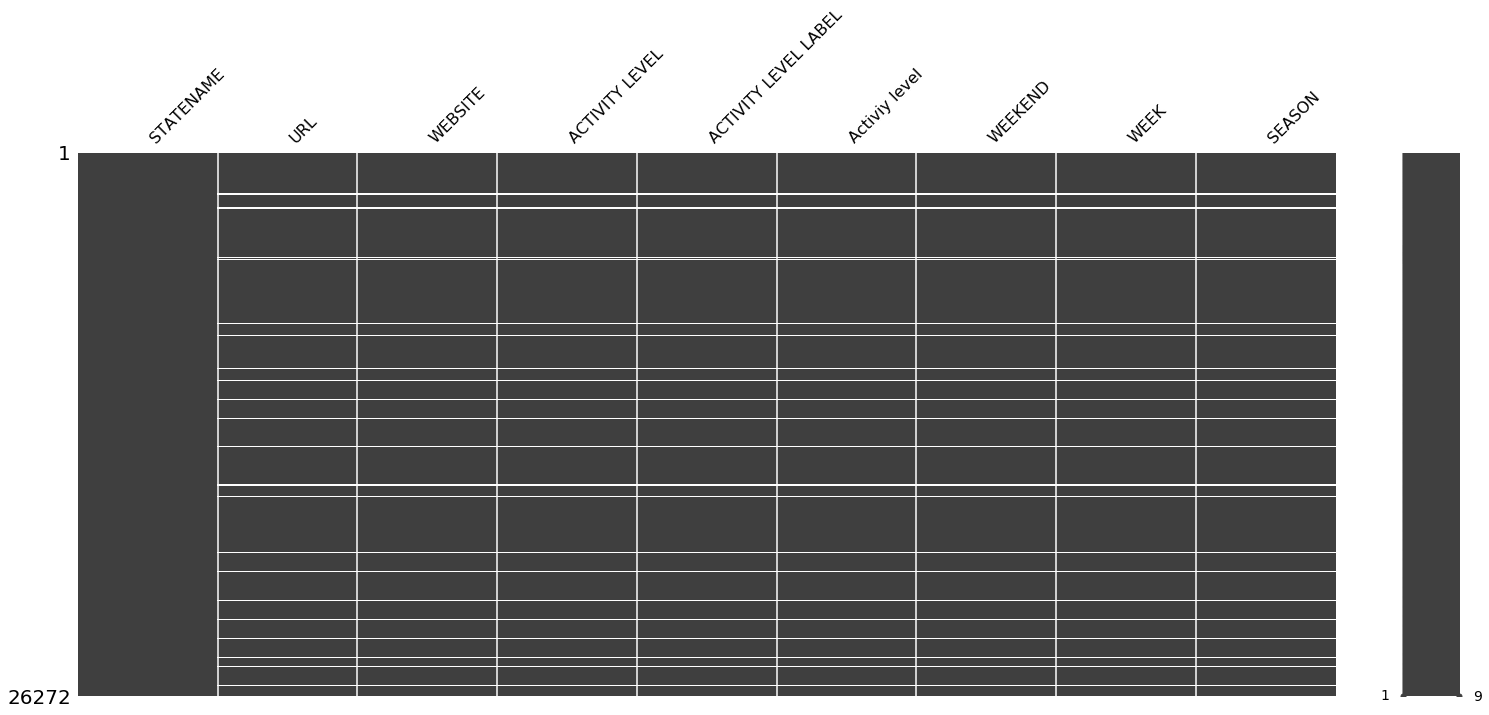

In [4]:
msn.matrix(flu_season)


In [5]:
help(flu_season.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame). (values not
        in the dict/Series/DataFrame will not be filled). This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use NEXT valid observation to fill gap
    axis : {0 or 'index', 1 or 'columns'}
    inplace : boolean, default False
        If True, fil

## 2. Statistics Population by Age

In [6]:
pop_agesex.head()

,STATE_ABR,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV,POPEST2017_CIV
0,US,10,0,0,0,United States,0,0,3944160,3951454,3962971,3926486,3931208,3954725,3984294,3955377,3939295
1,US,10,0,0,0,United States,0,1,3978090,3957695,3966056,3977264,3942441,3948689,3973189,4004017,3975252
2,US,10,0,0,0,United States,0,2,4096939,4090616,3970491,3978648,3991295,3958296,3965536,3990991,4021775
3,US,10,0,0,0,United States,0,3,4119051,4111682,4101643,3981321,3990699,4005424,3973376,3981326,4006755
4,US,10,0,0,0,United States,0,4,4063186,4077326,4121485,4111444,3992298,4003684,4019335,3987866,3995783


In [7]:
pop_agesex.columns

Index(['STATE_ABR', 'SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'SEX',
       'AGE', 'ESTBASE2010_CIV', 'POPEST2010_CIV', 'POPEST2011_CIV',
       'POPEST2012_CIV', 'POPEST2013_CIV', 'POPEST2014_CIV', 'POPEST2015_CIV',
       'POPEST2016_CIV', 'POPEST2017_CIV'],
      dtype='object')

In [8]:
#Checking unique values for age
print("The unique values are: ", len(pop_agesex.AGE.unique()))
pop_agesex.AGE.unique()

The unique values are:  87


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85, 999], dtype=int64)

In [9]:
#Subset of dataset
pop_agesex_sub1=pop_agesex[['NAME', 'SEX', 'AGE', 'ESTBASE2010_CIV', 'POPEST2010_CIV', 'POPEST2011_CIV',
                 'POPEST2012_CIV', 'POPEST2013_CIV', 'POPEST2014_CIV', 'POPEST2015_CIV', 'POPEST2016_CIV', 'POPEST2017_CIV']]

#Setting index
pop_agesex_sub1=pop_agesex_sub1.set_index("NAME")

### 2.1 Population by age and sex basic statistics

In [10]:
pop_agesex_sub1.describe()

,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV,POPEST2017_CIV
count,13572.000000,13572.000000,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04
mean,1.000000,53.494253,1.812720e+05,1.816111e+05,1.829806e+05,1.843520e+05,1.856716e+05,1.870891e+05,1.885313e+05,1.899271e+05,1.912977e+05
std,0.816527,104.905228,3.319803e+06,3.326021e+06,3.351248e+06,3.376486e+06,3.400772e+06,3.426902e+06,3.453486e+06,3.479129e+06,3.504245e+06
min,0.000000,0.000000,3.880000e+02,3.850000e+02,3.780000e+02,4.500000e+02,4.530000e+02,5.180000e+02,4.560000e+02,4.740000e+02,4.690000e+02
25%,0.000000,21.000000,1.093475e+04,1.098175e+04,1.106625e+04,1.114375e+04,1.124600e+04,1.133200e+04,1.143175e+04,1.154175e+04,1.163350e+04
50%,1.000000,43.000000,2.840700e+04,2.851500e+04,2.879250e+04,2.897000e+04,2.926750e+04,2.958150e+04,2.987700e+04,3.018450e+04,3.052150e+04
75%,2.000000,65.000000,6.280075e+04,6.280300e+04,6.348950e+04,6.383150e+04,6.409800e+04,6.457150e+04,6.498250e+04,6.522650e+04,6.563400e+04
max,2.000000,999.000000,3.075280e+08,3.081032e+08,3.104266e+08,3.127531e+08,3.149919e+08,3.173966e+08,3.198433e+08,3.222114e+08,3.245366e+08


### 2.2 Population by age and sex correlations

In [11]:
pop_agesex_sub1.corr()

,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV,POPEST2017_CIV
SEX,1.000000,0.000000,-0.016391,-0.016392,-0.016395,-0.016400,-0.016404,-0.016409,-0.016415,-0.016418,-0.016422
AGE,0.000000,1.000000,0.241865,0.241876,0.241915,0.241959,0.242000,0.242038,0.242072,0.242114,0.242161
ESTBASE2010_CIV,-0.016391,0.241865,1.000000,1.000000,0.999989,0.999979,0.999967,0.999953,0.999936,0.999915,0.999895
POPEST2010_CIV,-0.016392,0.241876,1.000000,1.000000,0.999991,0.999981,0.999969,0.999956,0.999940,0.999920,0.999899
POPEST2011_CIV,-0.016395,0.241915,0.999989,0.999991,1.000000,0.999991,0.999981,0.999969,0.999956,0.999939,0.999921
POPEST2012_CIV,-0.016400,0.241959,0.999979,0.999981,0.999991,1.000000,0.999992,0.999981,0.999969,0.999955,0.999940
POPEST2013_CIV,-0.016404,0.242000,0.999967,0.999969,0.999981,0.999992,1.000000,0.999992,0.999981,0.999968,0.999956
POPEST2014_CIV,-0.016409,0.242038,0.999953,0.999956,0.999969,0.999981,0.999992,1.000000,0.999992,0.999981,0.999969
POPEST2015_CIV,-0.016415,0.242072,0.999936,0.999940,0.999956,0.999969,0.999981,0.999992,1.000000,0.999992,0.999982
POPEST2016_CIV,-0.016418,0.242114,0.999915,0.999920,0.999939,0.999955,0.999968,0.999981,0.999992,1.000000,0.999992


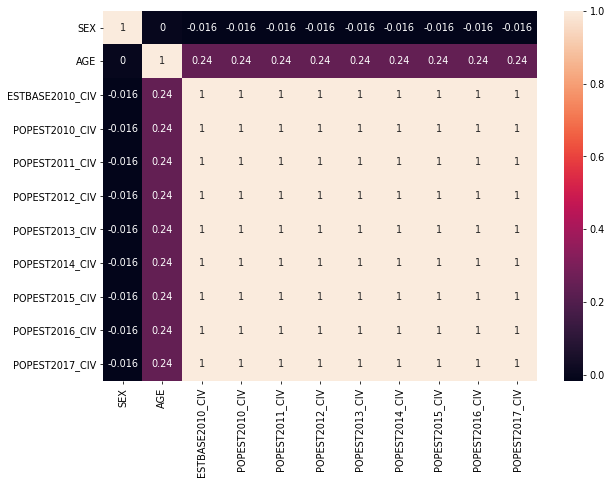

In [12]:
#The matrix of correlation
fig = plt.figure(figsize=(10,7), dpi=70)
sns.heatmap(pop_agesex_sub1.corr(), annot=True)

## 3. Statistics Population and Race

In [13]:
pop_racesex.head()

,STATE_ABR,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
0,AL,40,3,6,1,Alabama,0,0,1,0,37991,37991,37794,38541,37722,36675,37453,37532,36486,35735
1,AL,40,3,6,1,Alabama,0,0,1,1,38150,38150,38035,37688,38468,37737,36843,37774,37556,36836
2,AL,40,3,6,1,Alabama,0,0,1,2,39738,39738,39576,38197,37636,38394,37665,37001,37848,37775
3,AL,40,3,6,1,Alabama,0,0,1,3,39827,39828,39808,39692,38118,37694,38483,37776,37083,37960
4,AL,40,3,6,1,Alabama,0,0,1,4,39353,39353,39495,39870,39646,38115,37747,38479,37775,37123


In [14]:
pop_racesex.columns

Index(['STATE_ABR', 'SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'SEX',
       'ORIGIN', 'RACE', 'AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010',
       'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017'],
      dtype='object')

In [15]:
#Subset of dataset
pop_racesex_sub1=pop_racesex[['NAME', 'SEX', "ORIGIN", "RACE", 'AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010',
                           'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
                            'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
                           'POPESTIMATE2016', 'POPESTIMATE2017']]

#Setting index
pop_racesex_sub1=pop_racesex_sub1.set_index("NAME")

### 3.1 Population by race and sex basic statistics

In [16]:
pop_racesex_sub1.describe()

,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
count,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000,236844.000000
mean,1.000000,1.000000,3.500000,42.500000,5214.327372,5214.539613,5224.340427,5263.283512,5302.955059,5340.806691,5381.137373,5421.962794,5461.923207,5500.990998
std,0.816498,0.816498,1.707829,24.824436,18111.535290,18112.176325,18132.149512,18211.026995,18290.363846,18356.674505,18434.507181,18511.192334,18569.399869,18614.425512
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,21.000000,29.000000,29.000000,30.000000,31.000000,33.000000,34.000000,36.000000,37.000000,39.000000,41.000000
50%,1.000000,1.000000,3.500000,42.500000,200.000000,200.000000,202.000000,209.000000,217.000000,224.000000,232.000000,239.000000,248.000000,256.000000
75%,2.000000,2.000000,5.000000,64.000000,1767.000000,1767.000000,1778.000000,1831.000000,1881.000000,1937.000000,1994.000000,2050.000000,2110.000000,2166.000000
max,2.000000,2.000000,6.000000,85.000000,499596.000000,499657.000000,503497.000000,517297.000000,529770.000000,539138.000000,549457.000000,560235.000000,565614.000000,568520.000000


### 3.2 Population by age and sex correlations

In [17]:
pop_racesex_sub1.corr()

,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
SEX,1.000000,0.000000,0.000000,0.000000,-0.086672,-0.086673,-0.086745,-0.087028,-0.087335,-0.087664,-0.087973,-0.088302,-0.088691,-0.089123
ORIGIN,0.000000,1.000000,0.000000,0.000000,-0.147479,-0.147480,-0.147492,-0.147504,-0.147561,-0.147663,-0.147734,-0.147796,-0.147967,-0.148220
RACE,0.000000,0.000000,1.000000,0.000000,-0.350012,-0.350014,-0.350015,-0.349902,-0.349795,-0.349774,-0.349645,-0.349513,-0.349676,-0.350033
AGE,0.000000,0.000000,0.000000,1.000000,-0.060957,-0.060953,-0.060481,-0.058446,-0.056304,-0.054284,-0.052207,-0.050313,-0.048383,-0.046422
CENSUS2010POP,-0.086672,-0.147479,-0.350012,-0.060957,1.000000,1.000000,0.999943,0.998744,0.997671,0.996506,0.995333,0.993818,0.991943,0.990095
ESTIMATESBASE2010,-0.086673,-0.147480,-0.350014,-0.060953,1.000000,1.000000,0.999943,0.998744,0.997672,0.996506,0.995333,0.993819,0.991944,0.990096
POPESTIMATE2010,-0.086745,-0.147492,-0.350015,-0.060481,0.999943,0.999943,1.000000,0.998997,0.997930,0.996798,0.995673,0.994204,0.992421,0.990586
POPESTIMATE2011,-0.087028,-0.147504,-0.349902,-0.058446,0.998744,0.998744,0.998997,1.000000,0.999012,0.997970,0.996838,0.995711,0.994265,0.992542
POPESTIMATE2012,-0.087335,-0.147561,-0.349795,-0.056304,0.997671,0.997672,0.997930,0.999012,1.000000,0.999038,0.998008,0.996882,0.995772,0.994379
POPESTIMATE2013,-0.087664,-0.147663,-0.349774,-0.054284,0.996506,0.996506,0.996798,0.997970,0.999038,1.000000,0.999053,0.998026,0.996911,0.995835


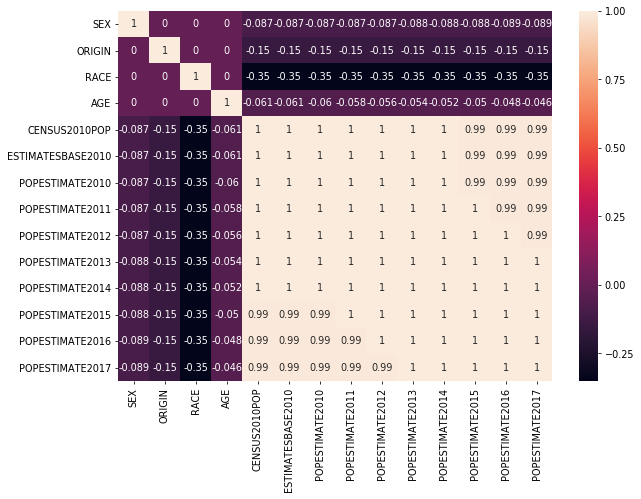

In [18]:
#The matrix of correlation
fig = plt.figure(figsize=(10,7), dpi=70)
sns.heatmap(pop_racesex_sub1.corr(), annot=True)

## 4. Statistics Flu by Week

In [19]:
flu_week.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS,Unnamed: 16
0,States,Alabama,2010,40,X,2.13477,X,X,X,X,X,X,249,35,11664,NaN,NaN
1,States,Alaska,2010,40,X,0.875146,X,X,X,X,X,X,15,7,1714,NaN,NaN
2,States,Arizona,2010,40,X,0.674721,X,X,X,X,X,X,172,49,25492,NaN,NaN
3,States,Arkansas,2010,40,X,0.696056,X,X,X,X,X,X,18,15,2586,NaN,NaN
4,States,California,2010,40,X,1.95412,X,X,X,X,X,X,632,112,32342,NaN,NaN


In [20]:
#Transforming to numeric
flu_week.ILITOTAL=pd.to_numeric(flu_week.ILITOTAL, errors="coerce")
flu_week["NUM. OF PROVIDERS"]=pd.to_numeric(flu_week["NUM. OF PROVIDERS"], errors="coerce")
flu_week["TOTAL PATIENTS"]=pd.to_numeric(flu_week["TOTAL PATIENTS"], errors="coerce")

In [21]:
flu_week.dtypes

REGION TYPE                                                                        object
REGION                                                                             object
YEAR                                                                                int64
WEEK                                                                                int64
% WEIGHTED ILI                                                                     object
%UNWEIGHTED ILI                                                                    object
AGE 0-4                                                                            object
AGE 25-49                                                                          object
AGE 25-64                                                                          object
AGE 5-24                                                                           object
AGE 50-64                                                                          object
AGE 65    

In [46]:
anio=flu_week.pivot_table(index=["REGION"], columns=["YEAR", "WEEK"], values="TOTAL PATIENTS")

In [49]:
anio.head()

YEAR           2010                                                        \
WEEK             40       41       42       43       44       45       46   
REGION                                                                      
Alabama     11664.0  11602.0  11945.0  12036.0  12069.0  12102.0  12286.0   
Alaska       1714.0   1684.0   1877.0   1860.0   1901.0   1996.0   1870.0   
Arizona     25492.0  24402.0  25174.0  26215.0  26313.0  25282.0  25897.0   
Arkansas     2586.0   2670.0   3306.0   2901.0   5228.0   4844.0   4760.0   
California  32342.0  34469.0  34170.0  34733.0  35153.0  32998.0  36175.0   

YEAR                                    ...        2019                    \
WEEK             47       48       49   ...          5        6        7    
REGION                                  ...                                 
Alabama      8418.0  10517.0  11289.0   ...     42566.0  43315.0  41196.0   
Alaska       1533.0   1740.0   1755.0   ...      5165.0   5392.0   5785.0   
Arizona     22138.0  26085.0  24065.0   ...     21501.0  19327.0  20815.0   
Arkansas     2616.0   4451.0   4311.0   ...      5419.0   5144.0   5422.0   
California  23060.0  36028.0  35077.0   ...     49449.0  48114.0  44454.0   

YEAR                                                                       
WEEK             8        9        10       11       12       13       14  
REGION                                                                     
Alabama     40017.0  36848.0  36476.0  39615.0  35385.0  35215.0  36465.0  
Alaska       5220.0   4876.0   4782.0   4991.0   3716.0   4943.0   3358.0  
Arizona     17796.0  19430.0  18127.0  17573.0  18363.0  15856.0   5578.0  
Arkansas     5206.0   4944.0   3524.0   3661.0   3323.0   3924.0   3354.0  
California  44334.0  50134.0  49564.0  48725.0  46642.0  43198.0  36379.0  

[5 rows x 444 columns]

In [53]:
anio2=anio.transpose()
anio2.head()

REGION     Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
YEAR WEEK                                                             
2010 40    11664.0  1714.0  25492.0    2586.0     32342.0   20282.0   
     41    11602.0  1684.0  24402.0    2670.0     34469.0   18294.0   
     42    11945.0  1877.0  25174.0    3306.0     34170.0   18905.0   
     43    12036.0  1860.0  26215.0    2901.0     34733.0   19238.0   
     44    12069.0  1901.0  26313.0    5228.0     35153.0   19862.0   

REGION     Connecticut  Delaware  District of Columbia  Florida   ...     \
YEAR WEEK                                                         ...      
2010 40         3831.0    3995.0                2599.0      NaN   ...      
     41         3780.0    4070.0                2802.0      NaN   ...      
     42         4009.0    4154.0                3070.0      NaN   ...      
     43         4797.0    4126.0                3241.0      NaN   ...      
     44         4789.0    4048.0                3176.0      NaN   ...      

REGION     Tennessee    Texas    Utah  Vermont  Virgin Islands  Virginia  \
YEAR WEEK                                                                  
2010 40      11651.0  50844.0  5751.0   2777.0             NaN   57721.0   
     41      11812.0  50670.0  7057.0   2946.0             NaN   60977.0   
     42      12211.0  51887.0  8171.0   3036.0             NaN   61855.0   
     43      12698.0  50622.0  6085.0   3255.0             NaN   60125.0   
     44      12119.0  51527.0  8284.0   2714.0             NaN   57607.0   

REGION     Washington  West Virginia  Wisconsin  Wyoming  
YEAR WEEK                                                 
2010 40        3137.0         8952.0     4946.0   5056.0  
     41        3269.0        10694.0     5328.0   4766.0  
     42        3096.0         8777.0     5807.0   5206.0  
     43        3141.0         9549.0     5245.0   4487.0  
     44        3052.0        10653.0     5472.0   4412.0  

[5 rows x 54 columns]

In [58]:
zz=anio2["Alabama"]

In [59]:
zz.to_excel("aa.xlsx")

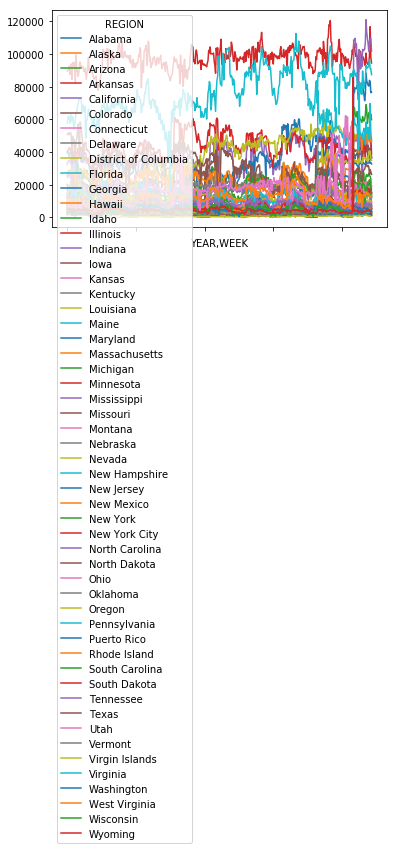

In [55]:
anio2.plot()

### 4.1 Statistics Flu by Week

In [22]:
flu_week.describe()

,YEAR,WEEK,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS,Unnamed: 16
count,23768.000000,23768.000000,23324.000000,23324.000000,23324.000000,0.0,0.0
mean,2014.535342,26.531807,300.248328,33.008832,14203.332190,NaN,NaN
std,2.473321,15.367787,620.131337,30.265550,19311.350886,NaN,NaN
min,2010.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2012.000000,13.000000,21.000000,13.000000,3129.000000,NaN,NaN
50%,2015.000000,26.500000,86.000000,23.000000,6445.000000,NaN,NaN
75%,2017.000000,40.000000,291.000000,45.000000,16936.000000,NaN,NaN
max,2019.000000,53.000000,11452.000000,214.000000,121056.000000,NaN,NaN


In [23]:
flu_week.corr()

,YEAR,WEEK,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS,Unnamed: 16
YEAR,1.000000,-0.139441,0.148271,0.090003,0.091220,NaN,NaN
WEEK,-0.139441,1.000000,-0.131352,-0.015669,-0.016282,NaN,NaN
ILITOTAL,0.148271,-0.131352,1.000000,0.594892,0.749716,NaN,NaN
NUM. OF PROVIDERS,0.090003,-0.015669,0.594892,1.000000,0.730400,NaN,NaN
TOTAL PATIENTS,0.091220,-0.016282,0.749716,0.730400,1.000000,NaN,NaN
PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


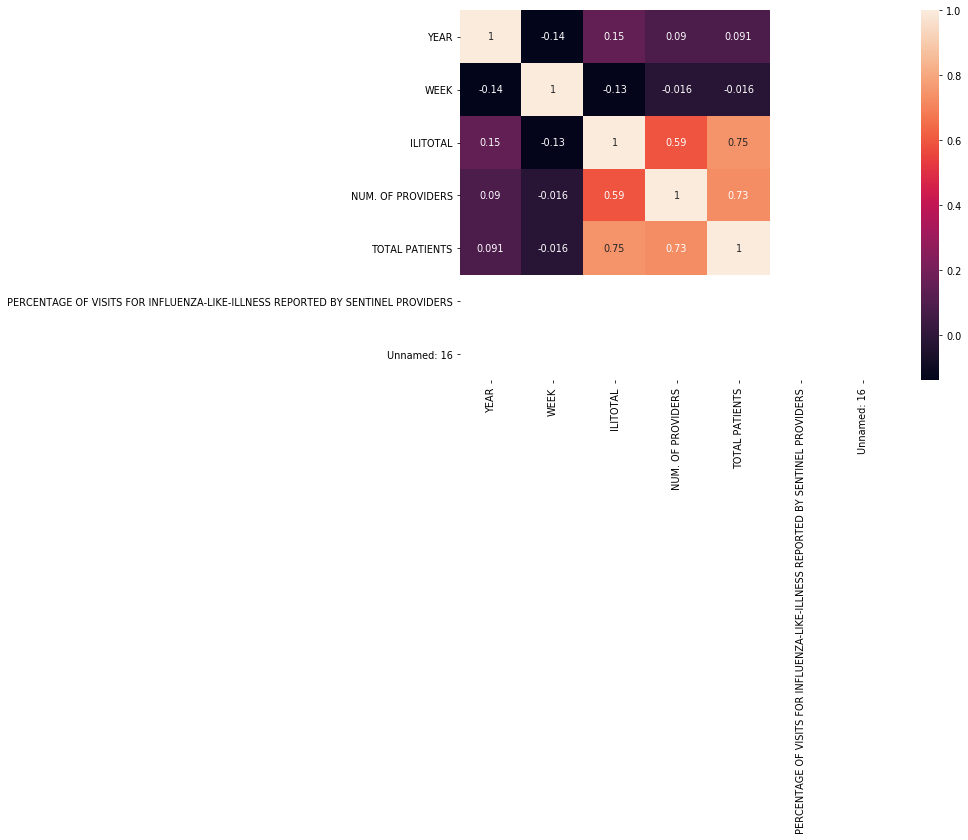

In [24]:
#The matrix of correlation
fig = plt.figure(figsize=(10,7), dpi=70)
sns.heatmap(flu_week.corr(), annot=True)

In [25]:
flu_week.YEAR.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

## 5. Statistics Flu by Season

In [65]:
flu_season["SEASON"].unique()

array(['2008-09', nan, '2009-10', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19'],
      dtype=object)

In [36]:
flu_season.WEBSITE.unique()

array(['Influenza Surveillance Report', 'Influenza & RSV Surveillance',
       'Communicable Disease and Immunizations', 'Influenza (Flu)',
       'Influenza Surveillance', 'Flu Statistics',
       'Weekly Influenza Surveillance Reports',
       'Weekly Influenza Surveillance in Georgia',
       "Hawaii's Influenza Surveillance Program", 'Influenza',
       'Seasonal Influenza Surveillance Reports', 'Influenza in Indiana',
       'Iowa Influenza Surveillance Network', 'Influenza Information',
       'Influenza - Flu', 'Weekly Surveillance Updates',
       'Influenza Surveillance Data',
       'Influenza Activity and Surveillance',
       'Weekly Influenza Activity: Statistics',
       'Mississippi Flu Surveillance and Influenza-Like Illness Reports',
       'Influenza Data & Statistical Reports ',
       'Influenza: What You Need to Know', 'Weekly Flu Report', nan,
       'Influenza Control and Surveillance',
       'Seasonal Influenza - Surveillance', 'Flu in New Mexico',
       'Nort

In [66]:
flu_season.head()

,STATENAME,URL,WEBSITE,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,Activiy level,WEEKEND,WEEK,SEASON
0,Alaska,http://dhss.alaska.gov/dph/Epi/id/Pages/influe...,Influenza Surveillance Report,Level 1,Minimal,1.0,Oct-04-2008,40.0,2008-09
1,Arizona,http://www.azdhs.gov/phs/oids/epi/flu/index.htm,Influenza & RSV Surveillance,Level 1,Minimal,1.0,Oct-04-2008,40.0,2008-09
2,Arkansas,http://www.healthy.arkansas.gov/programs-servi...,Communicable Disease and Immunizations,Level 6,Moderate,3.0,Oct-04-2008,40.0,2008-09
3,California,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,Influenza (Flu),Level 1,Minimal,1.0,Oct-04-2008,40.0,2008-09
4,Colorado,https://www.colorado.gov/pacific/cdphe/influenza,Influenza Surveillance,Level 1,Minimal,1.0,Oct-04-2008,40.0,2008-09


In [ ]:
##### Note: Join week table total patients, activity level 

#### Auxiliar table to join tables and perform statistical analysis

## 5. Joint Analysis

In [28]:
pop_agesex.NAME.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [29]:
flu_week.REGION.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New York City',
       'Virgin Islands', 'Puerto Rico'], dtype=object)

In [30]:
pop_racesex2=pop_racesex.groupby("NAME").sum()
pop_racesex2

,SUMLEV,REGION,DIVISION,STATE,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
NAME,,,,,,,,,,,,,,,,,,
Alabama,185760,13932,27864,4644,4644,4644,16254,197370,19118944,19120540,19142316,19194596,19255784,19310640,19360148,19403432,19442180,19498988
Alaska,185760,18576,41796,9288,4644,4644,16254,197370,2840924,2840996,2856060,2889036,2923300,2947040,2947036,2951916,2966088,2959180
Arizona,185760,18576,37152,18576,4644,4644,16254,197370,25568068,25569236,25628008,25861952,26176844,26464496,26825740,27209048,27634568,28065080
Arkansas,185760,13932,32508,23220,4644,4644,16254,197370,11663672,11664124,11686948,11754560,11796832,11827120,11859200,11902504,11952924,12017116
California,185760,18576,41796,27864,4644,4644,16254,197370,149015824,149018072,149310760,150690616,152076024,153389532,154805112,156129776,157185904,158146612
Colorado,185760,18576,37152,37152,4644,4644,16254,197370,20116784,20117300,20192116,20465644,20745320,21050224,21369244,21761780,22120420,22428616
Connecticut,185760,4644,4644,41796,4644,4644,16254,197370,14296388,14296456,14320684,14367708,14390820,14409880,14400752,14375448,14350740,14352736
Delaware,185760,13932,23220,46440,4644,4644,16254,197370,3591736,3591744,3598848,3631536,3667472,3700456,3739220,3776428,3810792,3847756
District of Columbia,185760,13932,23220,51084,4644,4644,16254,197370,2406892,2407064,2420160,2481344,2542520,2600456,2643188,2690944,2737344,2775888


In [31]:
### Notes: Check stack and unstack table

#http://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/

In [32]:
### Next Steps................

In [33]:
print(pop_agesex.isna())

       STATE_ABR  SUMLEV  REGION  DIVISION  STATE   NAME    SEX    AGE  \
0          False   False   False     False  False  False  False  False   
1          False   False   False     False  False  False  False  False   
2          False   False   False     False  False  False  False  False   
3          False   False   False     False  False  False  False  False   
4          False   False   False     False  False  False  False  False   
5          False   False   False     False  False  False  False  False   
6          False   False   False     False  False  False  False  False   
7          False   False   False     False  False  False  False  False   
8          False   False   False     False  False  False  False  False   
9          False   False   False     False  False  False  False  False   
10         False   False   False     False  False  False  False  False   
11         False   False   False     False  False  False  False  False   
12         False   False   False     F

In [34]:
for col in pop_agesex:
    print(col)

STATE_ABR
SUMLEV
REGION
DIVISION
STATE
NAME
SEX
AGE
ESTBASE2010_CIV
POPEST2010_CIV
POPEST2011_CIV
POPEST2012_CIV
POPEST2013_CIV
POPEST2014_CIV
POPEST2015_CIV
POPEST2016_CIV
POPEST2017_CIV
